# In this notebook I will be exploring the NBADATA.csv file, and trying to identify the relevant statistics for modelling.  


Which stats are the most correlated to a team's victory? 
-----------------------------------------------------

By looking at all of these box scores, we can see what the game's final point differential (+/-) was. Using this as an output along with all of the box score statistics, we can infer which values are the most correlated to it, along with other useful takeaways to be described concurrently with the study. 
    

In [1]:
#import dependencies, and dataset. 


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

filename = 'NBADATA.csv'

nba_dataset = pd.read_csv('../NBADATA.csv')

In [2]:
nba_dataset.head()

,Unnamed: 0,GAME_ID,Date,Team,Home,Away,FG,FGA,3P,3PA,...,AST,PF,ST,TO,BL,PTS,SPREAD,PLUS_MINUS,OU,TOTAL
0,4,21300001,10/29/13,Orlando Magic,0,1,36,93,9,19,...,17,26,10,17,6,87,12.0,-10,U,189.5
1,5,21300001,10/29/13,Indiana Pacers,1,0,34,71,7,17,...,17,13,4,20,18,97,-12.0,10,U,189.5
2,1,21300002,10/29/13,Chicago Bulls,0,1,35,83,7,26,...,23,27,11,18,4,95,5.0,-12,O,188.0
3,0,21300002,10/29/13,Miami Heat,1,0,37,72,11,20,...,26,21,10,18,7,107,-5.0,12,O,188.0
4,3,21300003,10/29/13,Los Angeles Clippers,0,1,41,83,8,21,...,27,21,11,16,4,103,-9.5,-13,O,201.5


# Exploratory Analysis

I want the basic box score stuff, and see see if generic box score features correlate to the PLUS_MINUS category, which corresponds to the final point differential of the game. As a sanity check, the spread should play one of the biggest roles, as vegas bookmakers are very smart, and often keep it close. 

In [3]:
#delete irrelevant columns (for this section), they will be useful for other pieces of the study but not here!
nba_explore = nba_dataset
del nba_explore['Unnamed: 0'],nba_explore['GAME_ID'],nba_explore['Date'],nba_explore['Team'],nba_explore['Home'],nba_explore['Away']
del nba_explore['OU'],nba_explore['TOTAL']

#add some other potential columns, like efficency. 
nba_explore['3P%'] = np.divide(nba_explore['3P'].values,nba_explore['3PA'].values) 

nba_explore['FG%'] = np.divide(nba_explore['FG'].values,nba_explore['FGA'].values)
nba_explore['FT%'] = np.divide(nba_explore['FT'].values,nba_explore['FTA'].values)
nba_explore['TRB']  = nba_explore['OR'] + nba_explore['DR']

nba_explore['AST/TO'] = np.divide(nba_explore['AST'].values,nba_explore['TO'].values)


relevant_stats = []
for col in nba_explore.columns:
    if col != 'PLUS_MINUS':
        print(col + " Correlation:")
        corr = np.corrcoef(nba_explore[col],nba_explore['PLUS_MINUS'])
        print(corr[0][1])
        
        #I've arbitrarily decided that if the abs(correlation) is greater than .1, 
        #it is statistically signifcant and correlated to outcome. Not entirely scientific, 
        #but as we'll see later the model still works so no need to lose sleep over having too many features. 
        if abs(corr[0][1]) < .1:
            pass
        else:
            relevant_stats.append(col)
        
        print()

FG Correlation:
0.503997991165

FGA Correlation:
-0.000850904870708

3P Correlation:
0.330232588337

3PA Correlation:
0.0879946317693

FT Correlation:
0.110525621062

FTA Correlation:
0.0682632854309

OR Correlation:
-0.0280868972788

DR Correlation:
0.419821151912

AST Correlation:
0.409512742091

PF Correlation:
-0.0607043277291

ST Correlation:
0.165059256663

TO Correlation:
-0.131423640983

BL Correlation:
0.196087441626

PTS Correlation:
0.567488838081

SPREAD Correlation:
-0.493897887864

3P% Correlation:
0.389249598123

FG% Correlation:
0.548656258878

FT% Correlation:
0.127611348862

TRB Correlation:
0.328001312084

AST/TO Correlation:
0.304760416223



In [4]:
print("The relevant statistics identified are ", relevant_stats)

The relevant statistics identified are  ['FG', '3P', 'FT', 'DR', 'AST', 'ST', 'TO', 'BL', 'PTS', 'SPREAD', '3P%', 'FG%', 'FT%', 'TRB', 'AST/TO']


# For a more in depth visualization of this problem, I've also tried to apply a function that apply a graphical correlation matrix to this dataset.

In [5]:
def plot_corr(df,size=20):
    '''Function plots a graphical correlation matrix for each pair of columns in the dataframe.

    Input:
        df: pandas DataFrame
        size: vertical and horizontal size of the plot'''

    corr = df.corr()
    fig, ax = plt.subplots(figsize=(size, size))
    ax.matshow(corr)
   # ax.set_legend()
    plt.xticks(range(len(corr.columns)), corr.columns);
    plt.yticks(range(len(corr.columns)), corr.columns);
    plt.legend()

/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


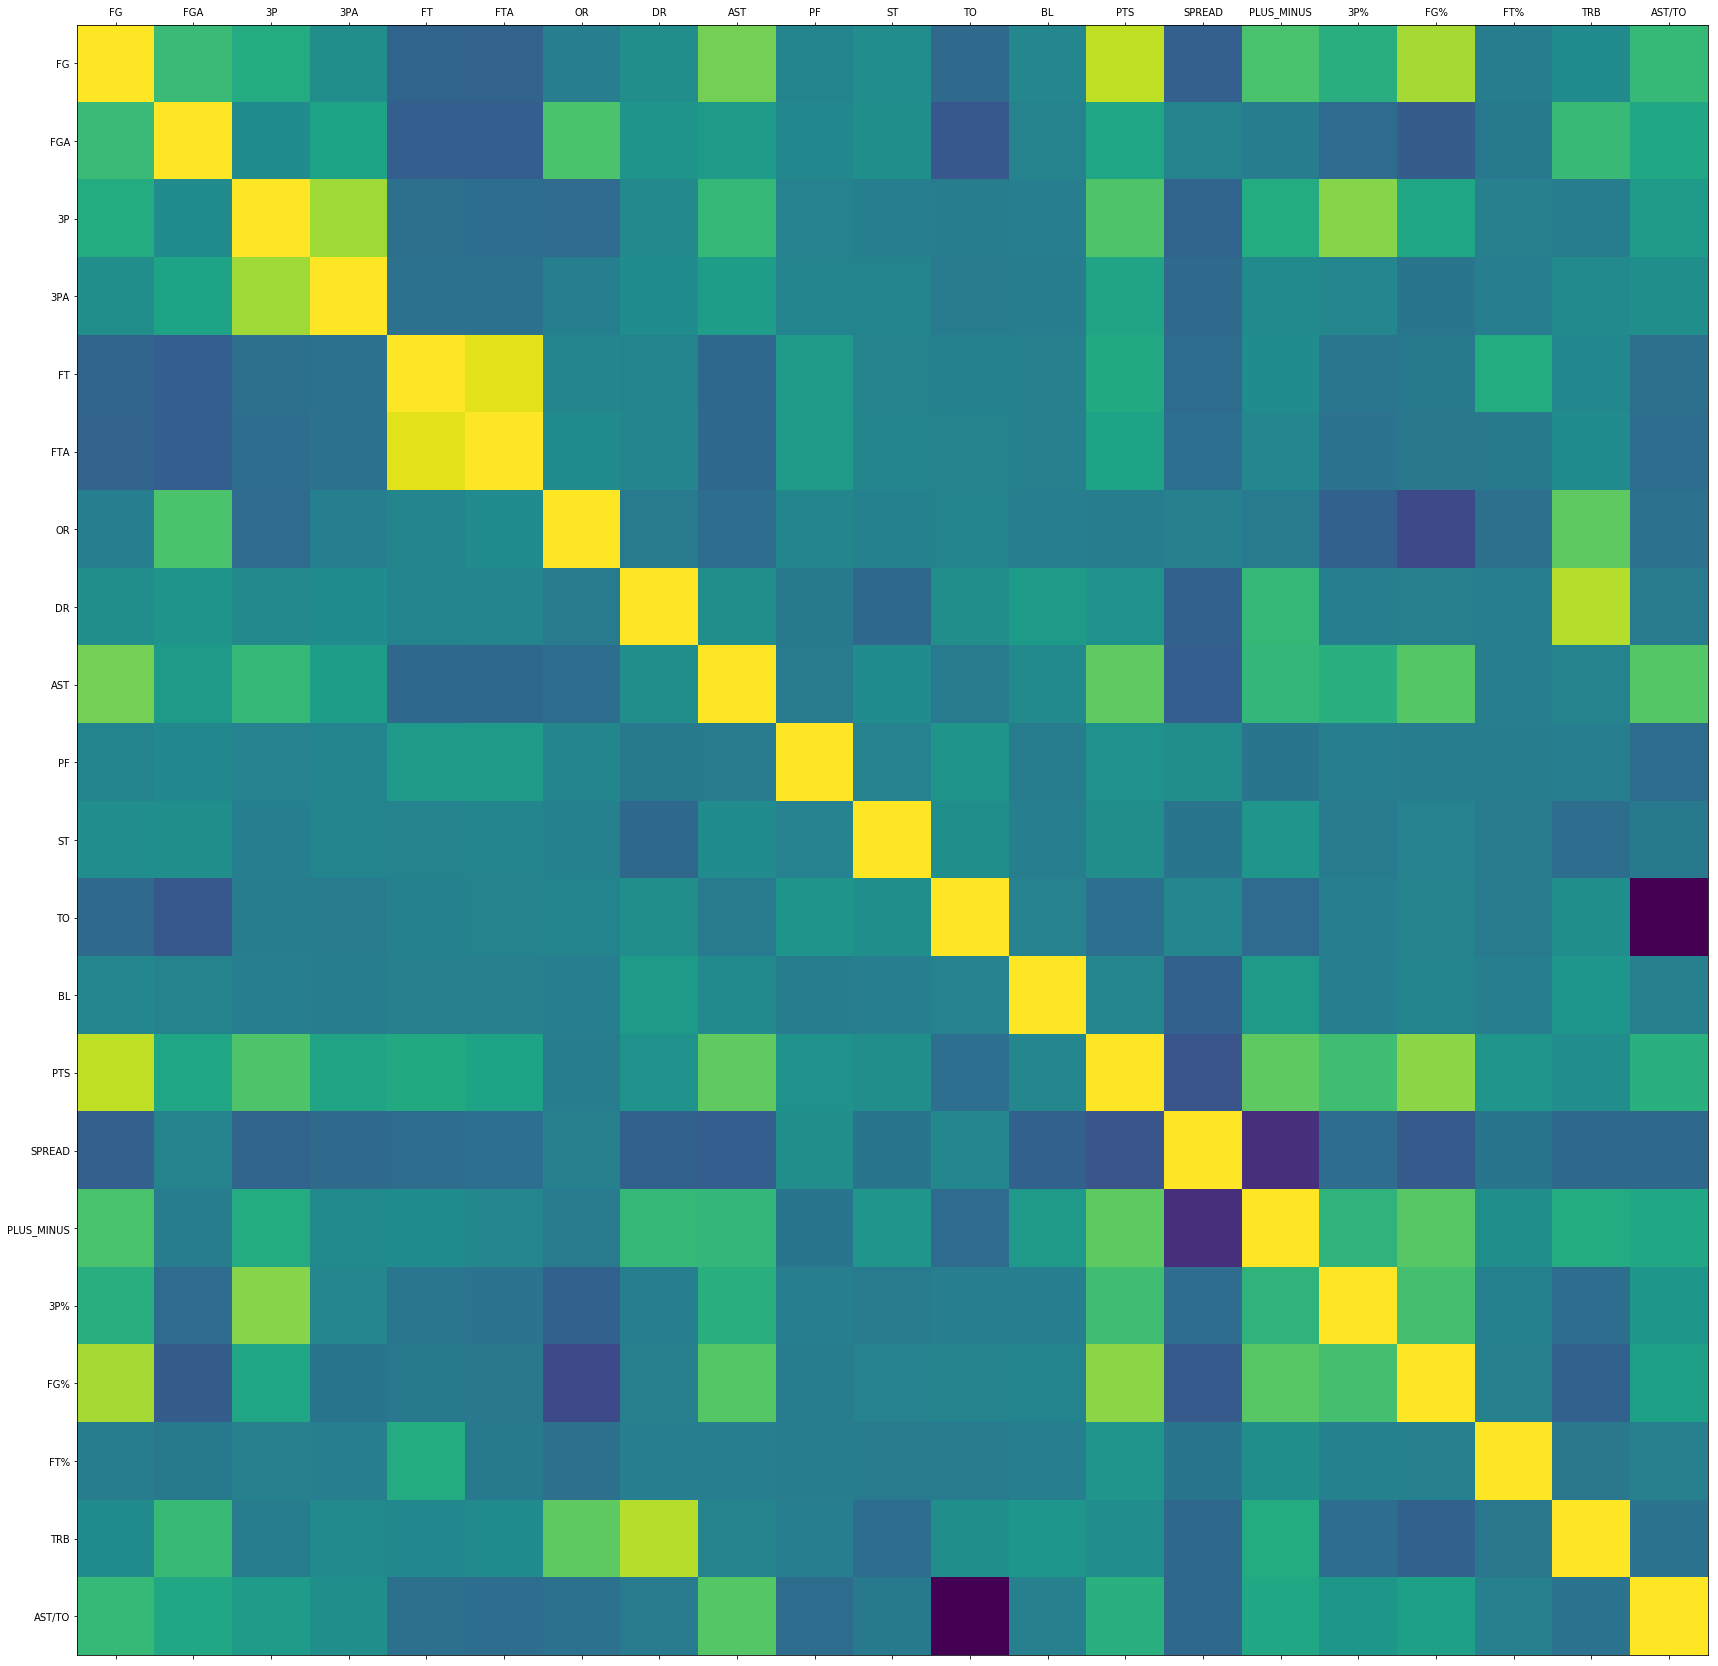

In [6]:
plot_corr(nba_explore,size=30)


So in additon to observing how each of these stats is correlated to the PLUS_MINUS of the game, this provides a correlation between each of these stats with each other. As another sanity check, the number of field goals made should be highly correlated to the points scored. This appears to be the case!

The next logical step in this study is to next identify whether or not a n game average can be used as a proxy for the corresponding perfomance in the next game. Please head over to the split_optimizer repo to see how this problem was handled.  